## Examples of using Transformation class

Author: Dimitris Giovanis, Michael Shields

Date: 12/4/2018

In [1]:
from UQpy.SampleMethods import MCS
from UQpy.Transformations import Correlate, Decorrelate, Nataf, InvNataf
import numpy as np
import matplotlib.pyplot as plt

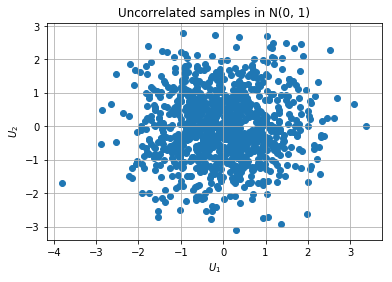

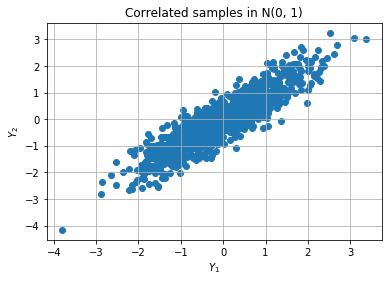

Caution: The samples provided must be uncorrelated standard normal random variables.


In [2]:
# Example 1: 
#In this example, the class 'Correlate' is employed to correlate standard normal samples 
#generated with the UQpy MCS class. 

# Generate uncorrelated standard normal samples using MCS class
x = MCS(dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)

# Plot the samples
plt.figure()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(x.samples[:, 0], x.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()

# Correlate the samples according to the following correlation matrix
Rho = np.array([[1.0, 0.9], [0.9, 1.0]])
y = Correlate(x, corr_norm=Rho)

plt.figure()
plt.title('Correlated samples in N(0, 1)')
plt.scatter(y.samples[:, 0], y.samples[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

# When samples are provided as an array
x_a = x.samples
y0 = Correlate(x_a, corr_norm=Rho, dimension=2)

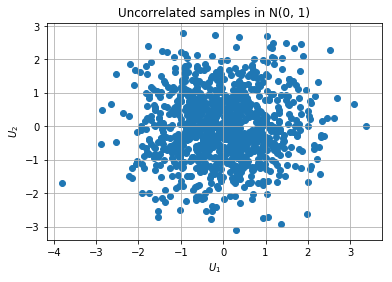

In [3]:
# Example 2: 
#In this example, the class 'Decorrelate' is employed to decorrelate the correlated standard normal samples 
#generated in the previous example. 

# Decorrelate standard normal samples using MCS class
q = Decorrelate(y, corr_norm=Rho)


# Plot the uncorrelated samples
plt.figure()
plt.title('Uncorrelated samples in N(0, 1)')
plt.scatter(q.samples[:, 0], q.samples[:, 1])
plt.grid(True)
plt.xlabel('$U_1$')
plt.ylabel('$U_2$')
plt.show()


UQpy: Computing Nataf correlation distortion...
UQpy: Done.
Transformed Correlation matrix:
[[ 1.          0.31649732]
 [ 0.31649732  1.        ]]


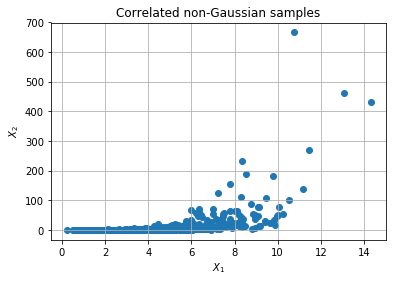

In [4]:
# Example 3: 
#In this example, the class 'InvNataf' is employed to transform the correlated standard normal samples 
#generated in example 1 to  correlated non-Gaussian samples.

# Transform correlated standard normal samples to non-Gaussian samples using the Inverse Nataf transformation.
x_ng = InvNataf(input_samples=y, corr_norm=Rho, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Transformed Correlation matrix:')
print(x_ng.corr)

plt.figure()
plt.title('Correlated non-Gaussian samples')
plt.scatter(x_ng.samples[:, 0], x_ng.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.31568159453964389]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.14268538246912976]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.042165228739204939]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.010543988432141937]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.0027558823676535299]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.00071214991018266798]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy

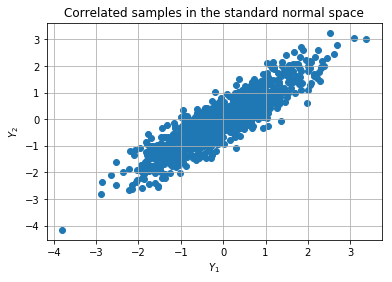

In [5]:
# Example 4:
# In this example, the class 'Nataf' is employed to transform the correlated non-Gaussian samples of example 3 
#back to standard normal samples.

x_g = Nataf(input_samples=x_ng, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Correlation matrix in the standard normal space')
print(x_g.corr_norm)

plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(x_g.samples[:, 0], x_g.samples[:, 1])
plt.grid(True)
plt.xlabel('$Y_1$')
plt.ylabel('$Y_2$')
plt.show()

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
Transformed Correlation matrix:
[[ 1.          0.31649732]
 [ 0.31649732  1.        ]]


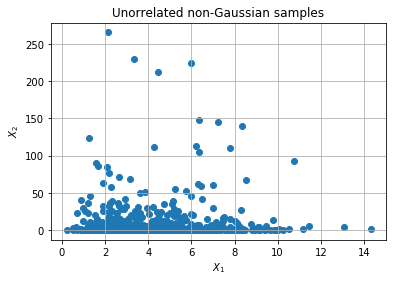

In [6]:
# Example 5:
# Similar to example 3 but with uncorrelated samples.

# Transform correlated standard normal samples to non-Gaussian samples using the Inverse Nataf transformation.
x_ng = InvNataf(input_samples=x, corr_norm=Rho, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Transformed Correlation matrix:')
print(x_ng.corr)

plt.figure()
plt.title('Unorrelated non-Gaussian samples')
plt.scatter(x_ng.samples[:, 0], x_ng.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.31568159453964389]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.14268538246912976]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.042165228739204939]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.010543988432141937]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.0027558823676535299]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.00071214991018266798]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy

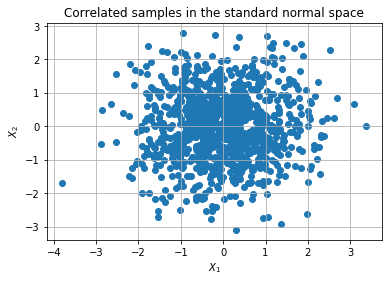

In [ ]:
# Example 6:
# Similar to example 4 but with uncorrelated samples.

x_g = Nataf(input_samples=x_ng, dist_name=['gamma', 'Lognormal'], dist_params=[[4, 0, 1], [2, 0, 1]])
print('Correlation matrix in the standard normal space')
print(x_g.corr_norm)

plt.figure()
plt.title('Correlated samples in the standard normal space')
plt.scatter(x_g.samples[:, 0], x_g.samples[:, 1])
plt.grid(True)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.show()

In [ ]:
# Example 7:
# Performs the Iterative Translation Approximation Method (ITAM) to estimate the underlying Gaussian 
# correlation from known values of the correlation for lognormal random variables.
# For a range of correlation values from -0.999 to 0.999, estimate the underlying Gaussian correlation 
#that most closely approximates yields the corresponding correlation for Lognormal(0,1) random variables.

w3 = np.zeros(101)
rho = np.linspace(-0.999, 0.999, 101)
for i in range(101):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = Nataf(corr=Rho1, dist_name=['Lognormal', 'Lognormal'], dist_params=[[2, 0.0, 4], [2, 0.0, 4]], itam_error2=0.001)
    w3[i] = ww.corr_norm[0, 1]
    print(i)

plt.plot(w3, rho)
plt.plot(rho, rho)
plt.show()

UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.3868990608879199]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 1.3868980914480282]
UQpy: ITAM Done.
0
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.3586834431005965]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 1.3586618463131934]
UQpy: ITAM Done.
1
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 1.3304711840346348]
UQpy: Computing Nataf correlation distortion.

UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.82201549984628086]
UQpy: ITAM Done.
20
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.79563714994746149]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.79415885364082017]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.79377407104501052]
UQpy: ITAM Done.
21
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.76759740246690267]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.76594855759389024]
UQpy: Comput

UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.42638937327279436]
UQpy: ITAM Done.
34
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.40541101243182431]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.39941523373951265]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.39842778515427119]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.3981402042410398]
UQpy: ITAM Done.
35
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.37781702612669249]
UQpy: Computi

UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.11608320711393569]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.11565239452645323]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.11549966443747418]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.11543526049968841]
UQpy: ITAM Done.
45
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.10580438765069672]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.089681852862935799]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQ

UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.00083941722998842822]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.00057645991890174807]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.00038869223108499906]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.00026536815765540656]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.00017964728223526907]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.00012231700673421135]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 8.2958122772022774e-05]
UQpy: ITAM Done.
52

UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.00031595130186190323]
UQpy: ITAM Done.
53
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.10308487213049297]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.86092302892156414]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.099176709063622054]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.68622923670499258]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.096471900137825098]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]

UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.17713463554277142]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.085133424232311711]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.29745489622736582]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.10118970069117428]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.51711852441184347]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.11459843123314713]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.89938821046445694]
UQpy: Computing Nataf correlation distortio

UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.10554796711492405]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.49270237381814397]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.13510418589308301]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.10007344285847292]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.075257821951060372]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.21013896480428165]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.10648864791226356]
UQpy: Computing Nataf correlation disto

UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.54845616524650831]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.15959871908655385]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.080833519006712609]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.074230455999929001]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.20166712323261718]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.11959707527044484]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.63522830600309377]
UQpy: Computing Nataf correlation dist

UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.1042847704027805]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.39689396784289771]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.16806944183843114]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 30]
['UQpy: Current error, ', 0.096183927057783586]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.091092737915869179]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.29525678061563565]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 33]
['UQpy: Current error, ', 0.15414164726138169]
UQpy: Computing Nataf correlation disto

UQpy: Done.
['UQpy: ITAM iteration number ', 34]
['UQpy: Current error, ', 0.19354520540944981]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 35]
['UQpy: Current error, ', 0.073625705595383673]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 36]
['UQpy: Current error, ', 0.082933320727249488]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.2434686768696023]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 38]
['UQpy: Current error, ', 0.15919863988148186]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 39]
['UQpy: Current error, ', 0.13766232054727268]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.12218950048031775]
UQpy: Computing Nataf correlation disto

UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.18409521640009702]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 42]
['UQpy: Current error, ', 0.15360978661691341]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.97455058660460081]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.24576807145245314]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.0072620285168849196]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.012764887267071119]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 47]
['UQpy: Current error, ', 0.020196463318693538]
UQpy: Computing Nataf correlation di

UQpy: Done.
['UQpy: ITAM iteration number ', 48]
['UQpy: Current error, ', 0.60860556610961081]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.24871931838019526]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.019823126714966936]
UQpy: ITAM Done.
61
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.29661256419204735]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.050533001274583531]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.12072199354174641]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]


UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.1826415313165928]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.15770820224544102]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.1724274583463862]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.17089243859820352]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.18024522005285207]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.16082948526158664]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.17433161374914458]
UQpy: Computing Nataf correlation distortion...


UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.11260479914342297]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.40195914063117211]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.27653816224794853]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.035749022839758983]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.060650213143022921]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.15838387612701404]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.18213453394788709]
UQpy: Computing Nataf correlation dist

UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.26073220036260786]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.24744679650128165]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.090254781879816171]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.13213641072891866]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.53219271434924431]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.31906161263210986]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.01553833827804716]
UQpy: Computing Nataf correlation disto

UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.37835736799960695]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.098695076112292154]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.32131632490139134]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.28464164017918542]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.049952007278869288]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 30]
['UQpy: Current error, ', 0.086302456577654299]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.26286435243880435]
UQpy: Computing Nataf correlation dis

UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.15827270057253856]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 33]
['UQpy: Current error, ', 0.20785434262805957]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 34]
['UQpy: Current error, ', 0.1494351195726567]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 35]
['UQpy: Current error, ', 0.20063839608767342]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 36]
['UQpy: Current error, ', 0.15730873683070504]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.2070832695778449]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 38]
['UQpy: Current error, ', 0.15028097210924746]
UQpy: Computing Nataf correlation distorti

UQpy: Done.
['UQpy: ITAM iteration number ', 39]
['UQpy: Current error, ', 0.20694702021112898]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.15244635181325128]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.21086084784947337]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 42]
['UQpy: Current error, ', 0.14833330035904338]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.2072566254774551]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.15212188368003524]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.21057926228451612]
UQpy: Computing Nataf correlation distort

UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.1852882407417191]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 47]
['UQpy: Current error, ', 0.24596510273987243]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 48]
['UQpy: Current error, ', 0.112820252427124]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.17832048587610452]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.1814081604599545]
UQpy: ITAM Done.
69
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.46102599356852014]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQ

UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.16853455293662384]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.77187245859457765]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.47189414140554803]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.15822551890497347]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.6867211484465483]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.45871496614373292]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.13809668585502616]
UQpy: Computing Nataf correlation distortion...


UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.096514715567315348]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.17274217857221952]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.17942537766932803]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.26556599567413691]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.094239929914224321]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.16962870848981798]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.77113707053831315]
UQpy: Computing Nataf correlation disto

UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.26865783653078407]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.09001360693312245]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.16763612378678547]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.74635633346357944]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.50745798496391947]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.18312775003929202]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.16658150343485109]
UQpy: Computing Nataf correlation distor

UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.14052925511294384]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.24413651829474611]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.10621798504520698]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.19897432985759567]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.14413190891732452]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.2484875661820912]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.10247436708603716]
UQpy: Computing Nataf correlation distortion...


UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.20242084545071157]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.13602193574425084]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.24394068334075555]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.10204161525559552]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.19697702579178572]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.14038223972955749]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.24947243439646438]
UQpy: Computing Nataf correlation distor

UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.10508191442108115]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.20547546526516586]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.12777719108425681]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.23806651899810982]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.10181293722789199]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.20050587695192018]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.13167198651

UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.10405956705570928]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.20776955386235246]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.119689648178013]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.23125635388627214]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.10146306625128924]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.20371098254213715]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.12280344404858604]
UQpy: Computing Nataf correlation distorti

UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.19326224513851095]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.11625244668653532]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.23447496573616697]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.085810423862222554]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.18424057442963596]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 9]
['UQpy: Current error, ', 0.1227923413194295]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 10]
['UQpy: Current error, ', 0.24445942072919838]
UQpy: Computing Nataf correlation distortion..

UQpy: Done.
['UQpy: ITAM iteration number ', 11]
['UQpy: Current error, ', 0.06270770664651816]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 12]
['UQpy: Current error, ', 0.14354680750239862]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 13]
['UQpy: Current error, ', 0.14316848846380453]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 14]
['UQpy: Current error, ', 0.27882001755413077]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 15]
['UQpy: Current error, ', 0.045404808527384856]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 16]
['UQpy: Current error, ', 0.10792517608754233]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 17]
['UQpy: Current error, ', 0.37948121599293083]
UQpy: Computing Nataf correlation disto

UQpy: Done.
['UQpy: ITAM iteration number ', 18]
['UQpy: Current error, ', 0.068350330232178291]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 19]
['UQpy: Current error, ', 0.15678664011719073]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 20]
['UQpy: Current error, ', 0.1252067984192044]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 21]
['UQpy: Current error, ', 0.25651204450699439]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 22]
['UQpy: Current error, ', 0.054827846999860236]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 23]
['UQpy: Current error, ', 0.12939583805731059]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 24]
['UQpy: Current error, ', 0.48615588672778248]
UQpy: Computing Nataf correlation disto

UQpy: Done.
['UQpy: ITAM iteration number ', 25]
['UQpy: Current error, ', 0.11136292914247775]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 26]
['UQpy: Current error, ', 0.23788811976327173]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 27]
['UQpy: Current error, ', 0.060261837524528558]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 28]
['UQpy: Current error, ', 0.14245963881892706]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 29]
['UQpy: Current error, ', 0.12561217146371575]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 30]
['UQpy: Current error, ', 0.26121351832220463]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 31]
['UQpy: Current error, ', 0.043640705671552274]
UQpy: Computing Nataf correlation dist

UQpy: Done.
['UQpy: ITAM iteration number ', 32]
['UQpy: Current error, ', 0.49758402783947137]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 33]
['UQpy: Current error, ', 0.14735104459063286]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 34]
['UQpy: Current error, ', 0.11276493125441145]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 35]
['UQpy: Current error, ', 0.24378473100070536]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 36]
['UQpy: Current error, ', 0.0476880327219424]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 37]
['UQpy: Current error, ', 0.11714437733183658]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 38]
['UQpy: Current error, ', 0.42644553470057067]
UQpy: Computing Nataf correlation distort

UQpy: Done.
['UQpy: ITAM iteration number ', 39]
['UQpy: Current error, ', 0.18025226186824464]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 40]
['UQpy: Current error, ', 0.081462693302512448]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 41]
['UQpy: Current error, ', 0.18941925979863874]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 42]
['UQpy: Current error, ', 0.075426197783942078]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 43]
['UQpy: Current error, ', 0.17743826940361002]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 44]
['UQpy: Current error, ', 0.083309062871612452]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 45]
['UQpy: Current error, ', 0.19302750346296332]
UQpy: Computing Nataf correlation dis

UQpy: Done.
['UQpy: ITAM iteration number ', 46]
['UQpy: Current error, ', 0.31443268524234746]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 47]
['UQpy: Current error, ', 0.5080702420630071]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 48]
['UQpy: Current error, ', 0.16527239532789448]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 49]
['UQpy: Current error, ', 0.081241051575161052]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 50]
['UQpy: Current error, ', 0.19136059047386197]
UQpy: ITAM Done.
86
UQpy: Initializing Iterative Translation Approximation Method (ITAM)
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 1]
['UQpy: Current error, ', 0.56417849986751223]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 2]


UQpy: Done.
['UQpy: ITAM iteration number ', 2]
['UQpy: Current error, ', 0.21006537835330116]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 3]
['UQpy: Current error, ', 0.032208185505037588]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 4]
['UQpy: Current error, ', 0.085208970609764192]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 5]
['UQpy: Current error, ', 0.29000292235601266]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 6]
['UQpy: Current error, ', 0.5017896506117745]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 7]
['UQpy: Current error, ', 0.17171905571309137]
UQpy: Computing Nataf correlation distortion...
UQpy: Done.
['UQpy: ITAM iteration number ', 8]
['UQpy: Current error, ', 0.056342965585750616]
UQpy: Computing Nataf correlation distortion.

In [ ]:
# Example 8:
# Calculate correlation distortion for the transformation of two random variables from normal to lognormal.
# Compute the correlation distortion at various values of Gaussian correlation.

w4 = np.zeros(101)
rho = np.linspace(-0.999, 0.999, 101)
for i in range(101):
    Rho1 = np.array([[1.0, rho[i]], [rho[i], 1.0]])
    ww = InvNataf(corr_norm=Rho1, dist_name=['Lognormal', 'Lognormal'], dist_params=[[2, 0.0, 1], [4, 0.0, 1]], dimension=2)
    w4[i] = ww.corr[0, 1]
    print(i)

plt.plot(rho, w4)
plt.plot(rho, rho)
plt.show()